In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
# Load the Boston dataset
# Loading and Preprocessing the Dataset
boston_data_path = 'boston_house_prices.csv'
boston = pd.read_csv(boston_data_path, header=1)
 
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# Assuming the target variable is in a column named 'MEDV'
X_boston = boston.drop('MEDV', axis=1)
y_boston = boston['MEDV']

# Split the dataset into training and test sets
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

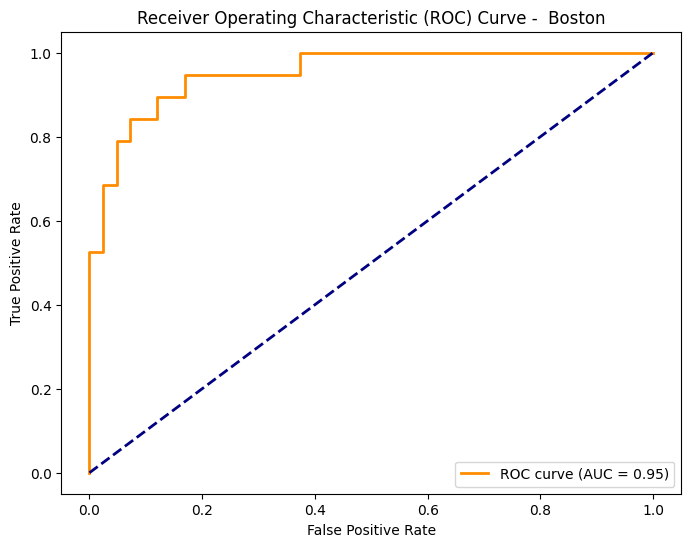

Mean Squared Error (BP) on Test Set: 0.11764705882352941


In [8]:
# Convert regression problem to binary classification
y_train_boston_binary = (y_train_boston > threshold).astype(int)
y_test_boston_binary = (y_test_boston > threshold).astype(int)

# MLPClassifier for BP on Boston Housing dataset
bp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
bp.fit(X_train_boston, y_train_boston_binary)

# Predict on the test set
bp_pred = bp.predict(X_test_boston)

# Compute Mean Squared Error
mse_bp = mean_squared_error(y_test_boston_binary, bp_pred)
# Define the threshold for binary classification
threshold = 25
# MLPClassifier for binary classification
bp_binary = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
bp_binary.fit(X_train_boston, y_train_boston_binary)

# Predict probabilities for the positive class
bp_pred_proba = bp_binary.predict_proba(X_test_boston)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_boston_binary, bp_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve  
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve -  Boston')
plt.legend(loc="lower right")
plt.show()

print("Mean Squared Error (BP) on Test Set:", mse_bp)
